### K-Means

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('csv/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


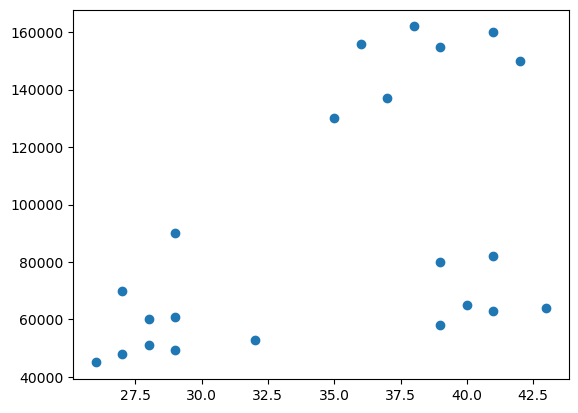

In [3]:
plt.scatter(df['Age'], df['Income($)'])
plt.show()

In [4]:
km = KMeans(n_clusters = 3, n_init = 'auto')
km

KMeans(n_clusters=3, n_init='auto')

In [5]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [6]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [7]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

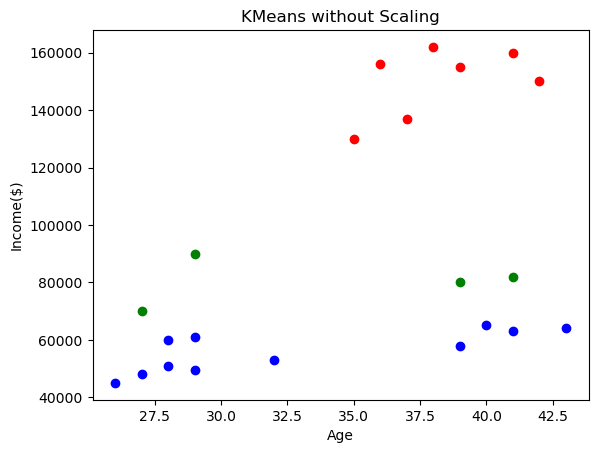

In [8]:
plt.title('KMeans without Scaling')
plt.xlabel('Age')
plt.ylabel('Income($)')

plt.scatter(df0['Age'], df0['Income($)'], color = 'red')
plt.scatter(df1['Age'], df1['Income($)'], color = 'blue')
plt.scatter(df2['Age'], df2['Income($)'], color = 'green')

plt.show()

In [9]:
scaler = MinMaxScaler()

In [10]:
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,1
3,Ismail,28,0.128205,1
4,Kory,42,0.897436,0


In [11]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [12]:
km1 = KMeans(n_clusters = 3, n_init = 'auto')
km1

KMeans(n_clusters=3, n_init='auto')

In [13]:
y1_pred = km1.fit_predict(df[['Age', 'Income($)']])
y1_pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [14]:
df['cluster'] = y1_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [15]:
km1.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [16]:
df3 = df[df.cluster == 0]
df4 = df[df.cluster == 1]
df5 = df[df.cluster == 2]

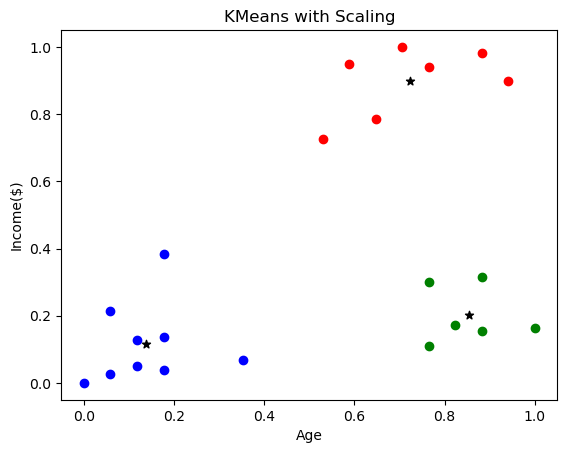

In [17]:
plt.title('KMeans with Scaling')
plt.xlabel('Age')
plt.ylabel('Income($)')

plt.scatter(df3['Age'], df3['Income($)'], color = 'red')
plt.scatter(df4['Age'], df4['Income($)'], color = 'blue')
plt.scatter(df5['Age'], df5['Income($)'], color = 'green')
plt.scatter(km1.cluster_centers_[:, 0], km1.cluster_centers_[:, 1], color = 'black', marker = '*')

plt.show()

In [18]:
k_rng = range(1, 11)
sse = []
for k in k_rng:
    km2 = KMeans(n_clusters = k, n_init = 'auto')
    km2.fit(df[['Age', 'Income($)']])
    sse.append(km2.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

In [19]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.368773407644059,
 0.35644572879234865,
 0.2792744093407547,
 0.2230053151601447,
 0.16259520162974458,
 0.11123550695239098,
 0.0920710484672571]

In [20]:
import numpy as np

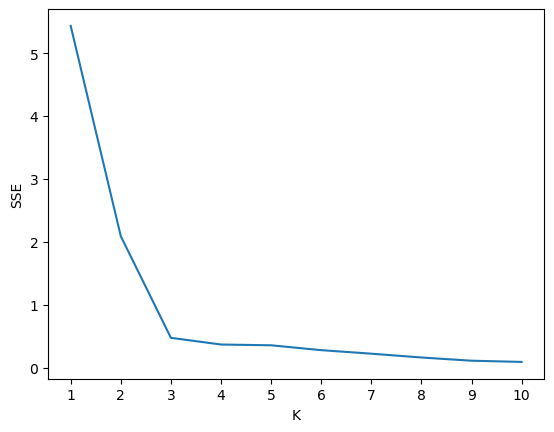

In [21]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.xticks(k_rng)

plt.plot(k_rng, sse)
plt.show()

### Exercise 8

In [22]:
from sklearn.datasets import load_iris

In [23]:
iris = load_iris()

In [24]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [25]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
scaler1 = MinMaxScaler()

In [27]:
scaler1.fit(iris_df[['sepal length (cm)']])
iris_df['sepal length (cm)'] = scaler1.transform(iris_df[['sepal length (cm)']])

scaler1.fit(iris_df[['sepal width (cm)']])
iris_df['sepal width (cm)'] = scaler1.transform(iris_df[['sepal width (cm)']])

scaler1.fit(iris_df[['petal length (cm)']])
iris_df['petal length (cm)'] = scaler1.transform(iris_df[['petal length (cm)']])

scaler1.fit(iris_df[['petal width (cm)']])
iris_df['petal width (cm)'] = scaler1.transform(iris_df[['petal width (cm)']])

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [28]:
km3 = KMeans(n_clusters = 3, n_init = 'auto')

In [29]:
y1_pred = km3.fit_predict(iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
y1_pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [30]:
iris_df['target'] = y1_pred
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,0
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,0
148,0.527778,0.583333,0.745763,0.916667,0


In [31]:
iris_df0 = iris_df[iris_df.target == 0]
iris_df1 = iris_df[iris_df.target == 1]
iris_df2 = iris_df[iris_df.target == 2]

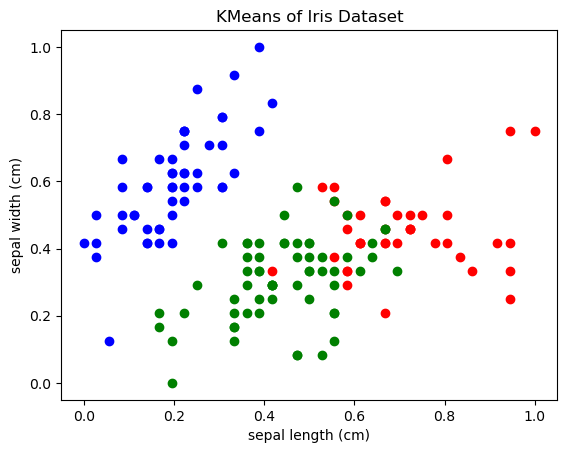

In [32]:
plt.title('KMeans of Iris Dataset')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.scatter(iris_df0['sepal length (cm)'], iris_df0['sepal width (cm)'], color = 'red')
plt.scatter(iris_df1['sepal length (cm)'], iris_df1['sepal width (cm)'], color = 'blue')
plt.scatter(iris_df2['sepal length (cm)'], iris_df2['sepal width (cm)'], color = 'green')
# plt.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:, 1], color = 'black', marker = '*')

plt.show()

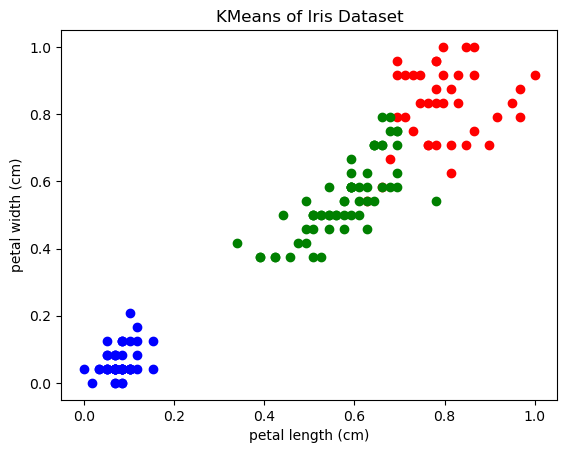

In [33]:
plt.title('KMeans of Iris Dataset')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.scatter(iris_df0['petal length (cm)'], iris_df0['petal width (cm)'], color = 'red')
plt.scatter(iris_df1['petal length (cm)'], iris_df1['petal width (cm)'], color = 'blue')
plt.scatter(iris_df2['petal length (cm)'], iris_df2['petal width (cm)'], color = 'green')
# plt.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:, 1], color = 'black', marker = '*')

plt.show()

In [36]:
k_rng = range(1, 11)
sse1 = []
for k in k_rng:
    km4 = KMeans(n_clusters = k, n_init = 'auto')
    km4.fit(iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
    sse1.append(km4.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

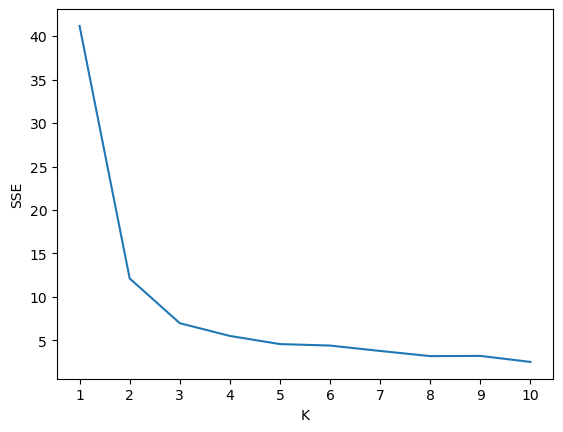

In [37]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.xticks(k_rng)

plt.plot(k_rng, sse1)
plt.show()